# Import the libraries:

In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

##  Define image properties:

In [2]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

## Prepare dataset for training model

In [3]:
filenames=os.listdir(r"C:\Users\amany\DS PROJECTS\data\dogs-vs-cats\train")
categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

## Create the neural net model:

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


## Analyzing model

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

## Define callbacks and learning rate:

In [6]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

## Manage data:

In [7]:
from sklearn.model_selection import train_test_split

df["category"] = df["category"].replace({0:'cat',1:'dog'})
train_df,validate_df = train_test_split(df,test_size=0.20,random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

In [8]:
df.head()

,filename,category
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat


In [9]:
train_df

,filename,category
0,dog.8479.jpg,dog
1,dog.876.jpg,dog
2,cat.10915.jpg,cat
3,dog.10127.jpg,dog
4,cat.11377.jpg,cat
...,...,...
19995,dog.6916.jpg,dog
19996,cat.36.jpg,cat
19997,cat.10771.jpg,cat
19998,dog.1713.jpg,dog


In [10]:
total_train,total_validate

(20000, 5000)

## Training and validation data generator:

In [11]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 r"C:\Users\amany\DS PROJECTS\data\dogs-vs-cats\train",
                                                    x_col='filename',
                                                    y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)


validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    r"C:\Users\amany\DS PROJECTS\data\dogs-vs-cats\train", 
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)


test_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)
test_generator = train_datagen.flow_from_dataframe(train_df,
                                                 r"C:\Users\amany\DS PROJECTS\data\dogs-vs-cats\train",
                                                   x_col='filename',
                                                   y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.
Found 20000 validated image filenames belonging to 2 classes.


## Model Training:

In [12]:
epochs=10
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

F:\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1333/1333 [==============================] - 1312s 979ms/step - loss: 0.9783 - accuracy: 0.5865 - val_loss: 0.9709 - val_accuracy: 0.5958
Epoch 2/10
1333/1333 [==============================] - 1209s 907ms/step - loss: 0.5907 - accuracy: 0.6954 - val_loss: 1.1335 - val_accuracy: 0.5403
Epoch 3/10
1333/1333 [==============================] - 1017s 763ms/step - loss: 0.5110 - accuracy: 0.7556 - val_loss: 0.5650 - val_accuracy: 0.7381
Epoch 4/10
1333/1333 [==============================] - 1023s 768ms/step - loss: 0.4758 - accuracy: 0.7783 - val_loss: 0.8746 - val_accuracy: 0.5908
Epoch 5/10
1333/1333 [==============================] - 922s 691ms/step - loss: 0.4439 - accuracy: 0.8003 - val_loss: 0.4068 - val_accuracy: 0.8268
Epoch 6/10
1333/1333 [==============================] - 905s 679ms/step - loss: 0.4207 - accuracy: 0.8084 - val_loss: 0.3969 - val_accuracy: 0.8148
Epoch 7/10
1333/1333 [==============================] - 948s 711ms/step - loss: 0.4050 - accuracy: 0.8220 - 

## Save the model:

In [17]:
model.save("model1_catsVSdogs_10epoch.h5")

## Test data preparation:

In [18]:
test_filenames = os.listdir(r"C:\Users\amany\DS PROJECTS\data\dogs-vs-cats\test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]
nb_samples

12500

In [19]:
np.ceil(nb_samples/batch_size)

834.0

## Make categorical prediction:

In [20]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
predict

array([[0.675881  , 0.324119  ],
       [0.7995752 , 0.2004248 ],
       [0.76979494, 0.23020509],
       ...,
       [0.0433107 , 0.95668936],
       [0.96421945, 0.03578055],
       [0.96492565, 0.03507437]], dtype=float32)

## Convert labels to categories:

In [21]:
print(train_generator.class_indices.items())
predict=predict[:12500]

dict_items([('cat', 0), ('dog', 1)])


In [22]:
test_df['category'] = np.argmax(predict, axis=-1)
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

## Visualize the prediction results:

In [23]:
test_df.head(18)

,filename,category
0,1.jpg,0
1,10.jpg,0
2,100.jpg,0
3,1000.jpg,0
4,10000.jpg,1
5,10001.jpg,0
6,10002.jpg,0
7,10003.jpg,0
8,10004.jpg,0
9,10005.jpg,0


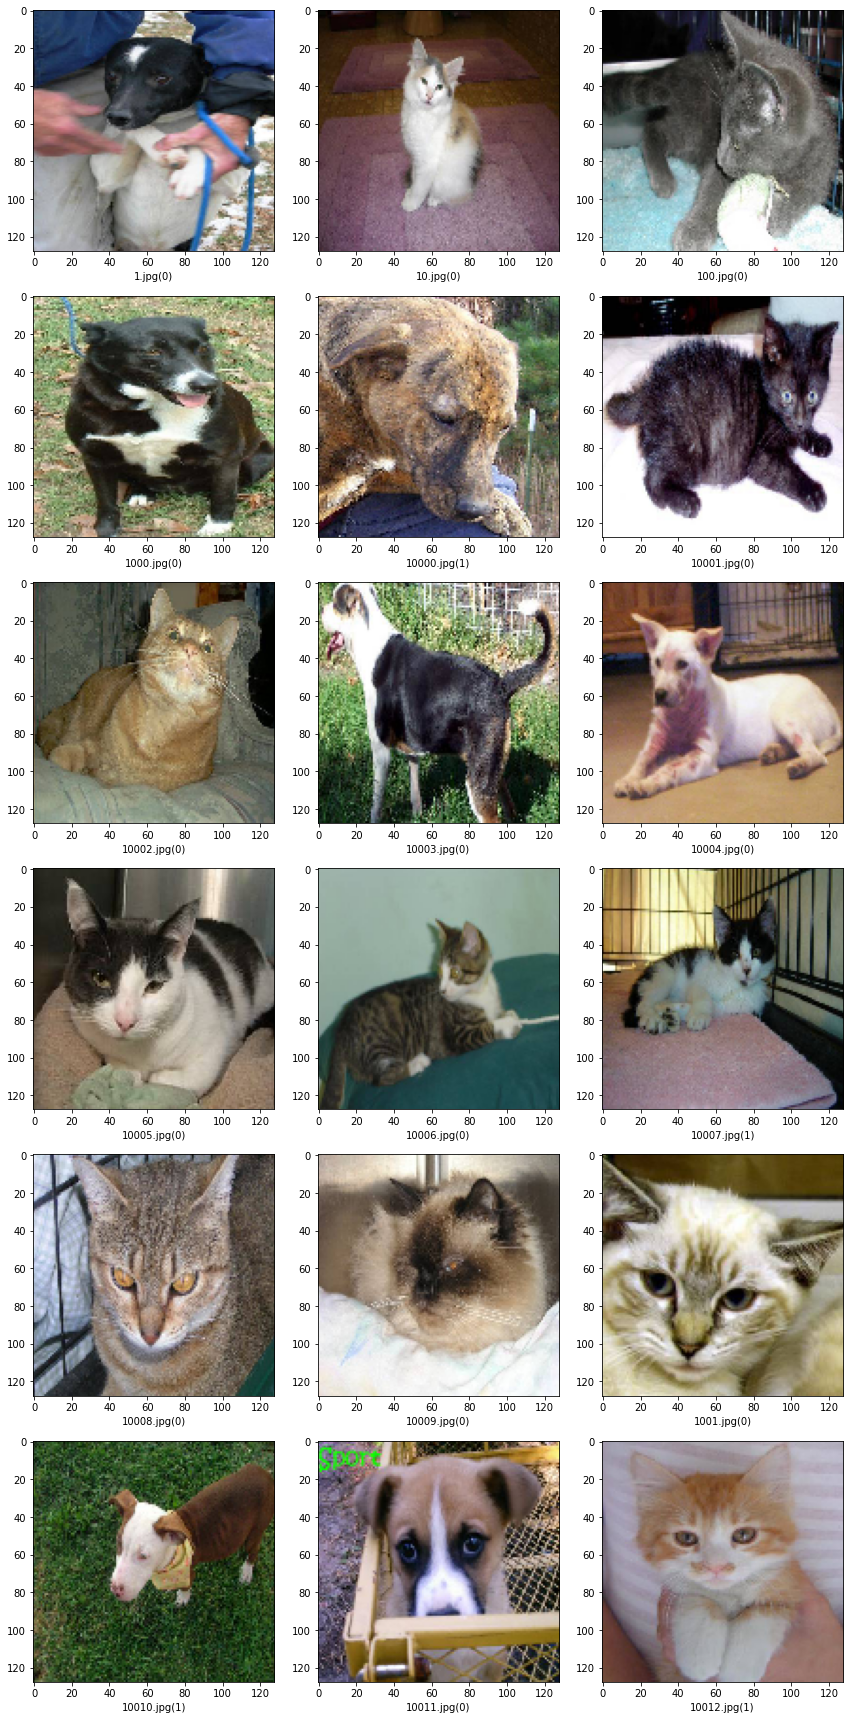

In [24]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img(r"C:/Users/amany/DS PROJECTS/data/dogs-vs-cats/test/"+filename, target_size=Image_Size)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

## Test your model performance on custom data:

In [26]:
results={
    0:'cat',
    1:'dog'
}

from PIL import Image
import numpy as np

im=Image.open(r"C:\Users\amany\Desktop\custom.jpg")
im=im.resize(Image_Size)
im=np.expand_dims(im,axis=0)
im=np.array(im)
im=im/255
pred=model.predict_classes([im])[0]
print(pred,results[pred])

F:\anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


1 dog
